In [1]:
# run this only once!!
import os
os. chdir("../..")
os.getcwd()

'/Users/tonpoppe/workspace/graphcase_experiments/graphcase_experiments'

In [15]:
import matplotlib.pyplot as plt
from pyvis import network as net
import numpy as np

# visualisation of the embed. 
The embeddings can be visualised in the following way.

1. plot barball graph.
2. plot sampled local neighbourhood of one node.
3. plot sampled local neighbourhoud in matrix.
4. view embedding
5. reconstruct the matrix visualisation
6. reconstruct the local graph.

In [2]:
import tensorflow as tf
from graphcase_experiments.experiments.barbell_exp import barbell_exp
from GAE.graph_case_controller import GraphAutoEncoder

params = {'batch_size': 9,
 'hub0_feature_with_neighb_dim': None,
 'verbose': False,
 'seed': 2,
 'encoder_labels': ['attr1', 'attr2'],
 'learning_rate': 0.002189781523436639,
 'act': tf.nn.sigmoid,
 'useBN': True,
 'dropout': 0.0745080843250766,
 'support_size': [2, 2],
 'dims': [3, 2,2,2],
 'epochs':2000}  #20000

/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# barbell graph

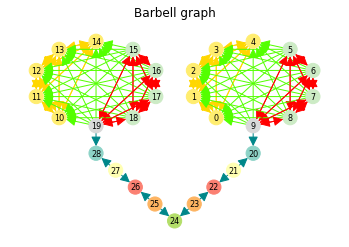

Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-10-07 08:08:00.465198: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-07 08:18:56.969220: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


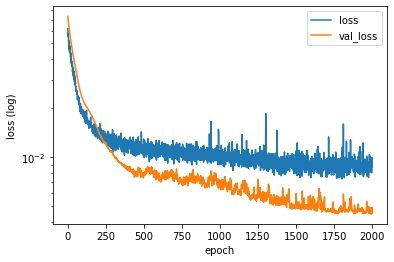

/Users/tonpoppe/workspace/graphcase_experiments/graphcase_experiments/graphcase_experiments/tools/embedding_plotter.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  embed_df['embed1'] = embed[:,0]
/Users/tonpoppe/workspace/graphcase_experiments/graphcase_experiments/graphcase_experiments/tools/embedding_plotter.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  embed_df['embed2'] = embed[:,1]


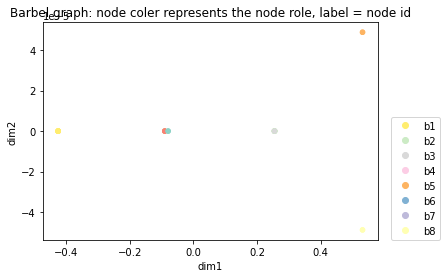

In [3]:
embed, G, tbl, mdl = barbell_exp(execute_grid_search=False, algo=GraphAutoEncoder, params=params, return_model=True)

## plot local neighbourhood of node

In [9]:
NODE_ID = 20

In [10]:
from GAE.graph_case_tools import Tools
nt = Tools.plot_node(G, NODE_ID)
nt.show("test_graph.html")

## plot matrix of local neighbourhood

In [11]:
from GAE.graph_reconstructor import GraphReconstructor

l1_struct, graph2 = mdl.get_l1_structure(NODE_ID, show_graph=False, node_label='node_id', deduplicate=False)
print(f"l1 structure has shape {l1_struct.shape}")
nt = GraphReconstructor().show_pyvis(graph2)
nt.show('/Users/tonpoppe/Downloads/sampled_neighbourhood_barbell_20.html')



l1 structure has shape (1, 24, 3)


In [12]:
# from GAE.graph_case_tools import Tools

# import matplotlib.pyplot as plt
# from pyvis import network as net
# import numpy as np

# fig, ax = plt.subplots(1,1, figsize=(10,10))
# # im = Tools.plot_layer(np.squeeze(l1_struct), 10)
# # ax[0].imshow(im, cmap='gray', vmin=0, vmax=255)

# # GraphReconstructor.show_graph(graph2, ax=ax)

# nt.show('/Users/tonpoppe/Downloads/sampled_neighbourhood_barbell_20.html')
# plt.show()

embedding is [[0.71437705 0.20426953 0.61350954 0.49031192]]


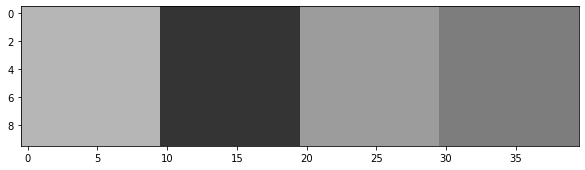

In [16]:
# create embeddign of node
fig, ax = plt.subplots(1,1, figsize=(10,10))
print(f"embedding is {embed[NODE_ID:NODE_ID+1, 1:]}")
im = Tools.plot_layer(embed[NODE_ID:NODE_ID+1, 1:], 10)
ax.imshow(im, cmap='gray', vmin=0, vmax=255)
plt.show()


In [17]:
# decode the embedding
feat_out, df_out, recon_graph = mdl.decode(embed[NODE_ID,1:], incl_graph='graph', delta=0.01)
# GraphReconstructor.show_graph(recon_graph)
nt = GraphReconstructor().show_pyvis(recon_graph)
nt.show('/Users/tonpoppe/Downloads/recon_neighbourhood_barbell_20.html')

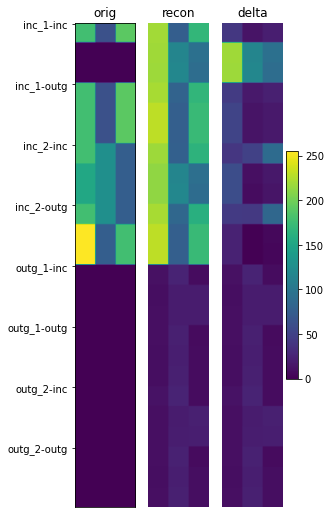

In [36]:
# Compare the iput vectors
import numpy as np
delta = np.abs(l1_struct - df_out)
fig, ax = plt.subplots(1,3, figsize=(4,10), gridspec_kw={'width_ratios': [3,3,3.75]})
im_orig = Tools.plot_layer(np.squeeze(l1_struct), 10)
im_recon = Tools.plot_layer(np.squeeze(np.abs(df_out)), 10)
im_delta = Tools.plot_layer(np.squeeze(delta), 10)

ax[0].imshow(im_orig, vmin=0, vmax=255)
ax[0].set_title("orig")
ax[1].imshow(im_recon, vmin=0, vmax=255)
ax[1].set_title("recon")
im_delta = ax[2].imshow(im_delta, vmin=0, vmax=255)
ax[2].set_title("delta")

ax[1].set_axis_off()
ax[2].set_axis_off()
ax[0].set_yticks(np.arange(0, 240, step= 30),['inc_1-inc','inc_1-outg','inc_2-inc','inc_2-outg','outg_1-inc','outg_1-outg','outg_2-inc','outg_2-outg'])
ax[0].set_xticks(ticks=[])

fig.colorbar(im_delta, ax=ax[2])
plt.show()

## visualising the impact of the embedding dimensions

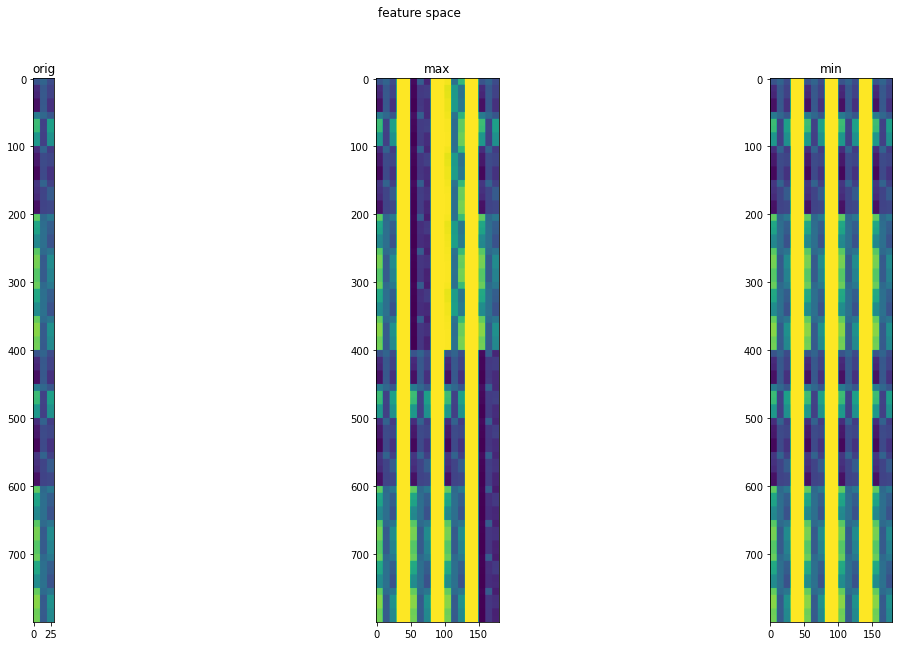

In [109]:
DIMENSION = 4
NODE_ID = 24
node_embed = np.zeros(5) #embed[NODE_ID] 
def calc_recon_per_value_per_dimensions(node_embed, mdl, value):
    df_out = None
    embed_size = node_embed[1:].shape[0]
    for i in range(embed_size):
        new_embed = node_embed.copy()
        new_embed[i] = value
        _, df_out_incr, _ = mdl.decode(new_embed[1:], incl_graph='graph')
        df_out_incr = np.squeeze(df_out_incr)
        if df_out is None:
            df_out = df_out_incr
        else:
            df_out = tf.concat([df_out, np.ones((df_out.shape[0],2)), df_out_incr], axis=1)
    return df_out

df_out_max = calc_recon_per_value_per_dimensions(node_embed, mdl, 1)
df_out_min = calc_recon_per_value_per_dimensions(node_embed, mdl, 0)
_, df_out, _ = mdl.decode(node_embed[1:], incl_graph='graph')

fig, ax = plt.subplots(1,3, figsize=(20,10))
im_max = Tools.plot_layer(df_out_max, 10)
im_min = Tools.plot_layer(df_out_min, 10)
im_orig = Tools.plot_layer(np.squeeze(df_out), 10)

ax[0].imshow(im_orig, vmin=0, vmax=255)
ax[1].imshow(im_max, vmin=0, vmax=255)
ax[2].imshow(im_min, vmin=0, vmax=255)

ax[0].set_title("orig")
ax[1].set_title("max")
ax[2].set_title("min")


fig.suptitle("feature space")
plt.show()


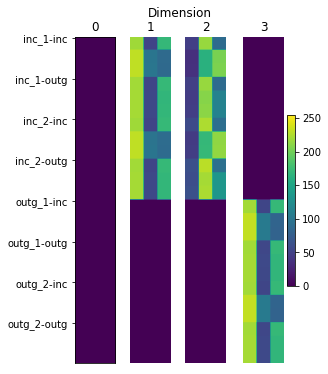

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from GAE.graph_case_tools import Tools

DELTA = 0.3

NODE_ID = 20
node_embed = embed[NODE_ID] 
embed_size = node_embed[1:].shape[0]
def calc_recon_per_value_per_dimensions(node_embed, mdl, value):
    df_out = []
    embed_size = node_embed[1:].shape[0]
    for i in range(embed_size):
        new_embed = node_embed.copy()
        new_embed[i] = new_embed[i] + value
        _, df_out_incr, _ = mdl.decode(new_embed[1:], incl_graph='graph')
        df_out_incr = np.squeeze(df_out_incr)
        df_out.append(df_out_incr)
    return df_out

df_out_max = calc_recon_per_value_per_dimensions(node_embed, mdl, DELTA)
df_out_min = calc_recon_per_value_per_dimensions(node_embed, mdl, -DELTA)
df_delta = []

fig, ax = plt.subplots(1,embed_size, figsize=(4,6), gridspec_kw={'width_ratios': [3, 3, 3, 3.75]})
for i in range(embed_size):
    df_delta = df_out_max[i] - df_out_min[i]
    im = Tools.plot_layer(df_delta, 10)

    im_delta = ax[i].imshow(im, vmin=0, vmax=255)
    ax[i].set_title(i)
    if i > 0:
        ax[i].set_axis_off()

    else:
        ax[i].set_yticks(np.arange(0, 240, step= 30),['inc_1-inc','inc_1-outg','inc_2-inc','inc_2-outg','outg_1-inc','outg_1-outg','outg_2-inc','outg_2-outg'])
        ax[i].set_xticks(ticks=[])
        # ax[i].set_ylabel(loc='bottem')

fig.colorbar(im_delta, ax=ax[3])
fig.suptitle("Dimension", y = 0.95)

plt.show()


# linearity on ring graph 
with noise level 0.7

In [165]:
import pickle
from GAE import graph_case_controller
from graphcase_experiments.algos.GraphCaseWrapper import GraphCaseWrapper
from graphcase_experiments.tools.calculate_embed import calculate_graphcase_embedding
from GAE import graph_reconstructor

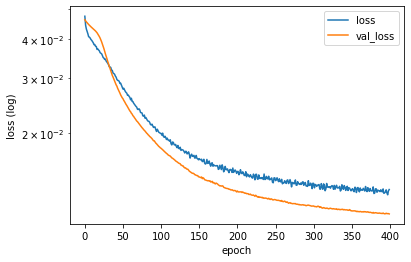

In [166]:
ring_path = 'graphcase_experiments/graphs/sampled_ring_graphs_dim5/fraction0.5_delta0.7_seed11.pickle'
data_path = 'graphcase_experiments/data/comp/'

COMP_PARAMS = {
        'batch_size': 30,
        'hub0_feature_with_neighb_dim': None,
        'verbose': False,
        'seed': 1,
        'encoder_labels': ['attr1', 'attr2'],
        'learning_rate': 0.0003668872396300966,
        'act': tf.nn.sigmoid,
        'useBN': True,
        'dropout': 0.09859650451427784,
        'support_size': [4, 4],
        'dims': [3, 128, 128, 128],
        'epochs': 400,
    }

G_ring = pickle.load(open(ring_path, 'rb'))
ring_emb, tbl, mdl = calculate_graphcase_embedding(
            G_ring, data_path, params=COMP_PARAMS, verbose=True, algo=GraphCaseWrapper, return_model=True
)

## additiviteit van de local neighbourhood
check if local neighbourhood is split in half and converted into an embedding, if the som of the embedding is equal to the original embedding. 

- get the l1_struct of the graph for node 24.
- split the l1_struct to match it with the two different neighbourhoods.
- calculate the embedding of L1 orig, and 2 sub noeighbourhoods.

In [100]:
NODE_ID = 24
l1_struct, graph_node = mdl.get_l1_structure(NODE_ID, show_graph=False, node_label='node_id', deduplicate=False)
l1_struct.shape

TensorShape([1, 80, 10])

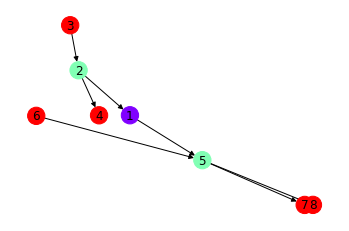

In [101]:

fig, ax = plt.subplots()
GraphReconstructor.show_graph(graph_node, ax=ax)
plt.show()

In [98]:
mdl.model.calculate_embedding(l1_struct)

2022-10-07 09:26:50.631627: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at strided_slice_op.cc:108 : INVALID_ARGUMENT: slice index 2 of dimension 0 out of bounds.


InvalidArgumentError: slice index 2 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

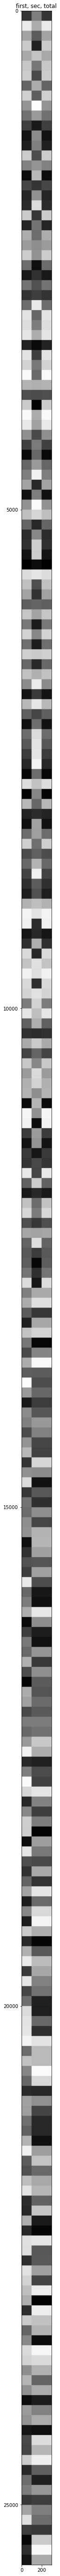

In [102]:
from GAE import graph_reconstructor

NODE_ID = 24
l1_struct, graph_node = mdl.get_l1_structure(NODE_ID, show_graph=False, node_label='node_id', deduplicate=False)

mask = np.zeros(l1_struct.shape)
border = int(l1_struct.shape[1] / 2)
mask_first = mask.copy()
mask_first[:,:border,:]=1
mask_second = mask.copy()
mask_second[:,border:,:]=1 
l1_first = tf.math.multiply(l1_struct,mask_first)
l1_second = tf.math.multiply(l1_struct,mask_second)

embed_node = mdl.model.encoder(l1_struct, False)[0]
embed_first = mdl.model.encoder(l1_first, False)[0]
embed_second = mdl.model.encoder(l1_second, False)[0]
delta_ring = embed_node - embed_first - embed_second

# stack embeddings
embed_combined = np.vstack((embed_first,embed_second, embed_node))


# print(f"embedding for node {NODE_ID} is {np.squeeze(embed_node)}")
# print(f"embedding for first incoming neighbourhood is {np.squeeze(embed_first)}")
# print(f"embedding for second incoming neighbourhood is {np.squeeze(embed_second)}")

fig, ax = plt.subplots(1,1, figsize=(3,100))
im = Tools.plot_layer(np.transpose(embed_combined), 100)
ax.imshow(im, cmap='gray', vmin=0, vmax=255)
ax.set_title("first, sec, total")
plt.show()

In [56]:
embed_first.shape

TensorShape([1, 1, 256])

## additiviteit van de embedding
check if some of two embedding is equal to the output.

- create an embeddings 0.5,0,0,0, 0, .5, 0,0 and .5, .5, 0,0
- create reconstruction of the three and compare 

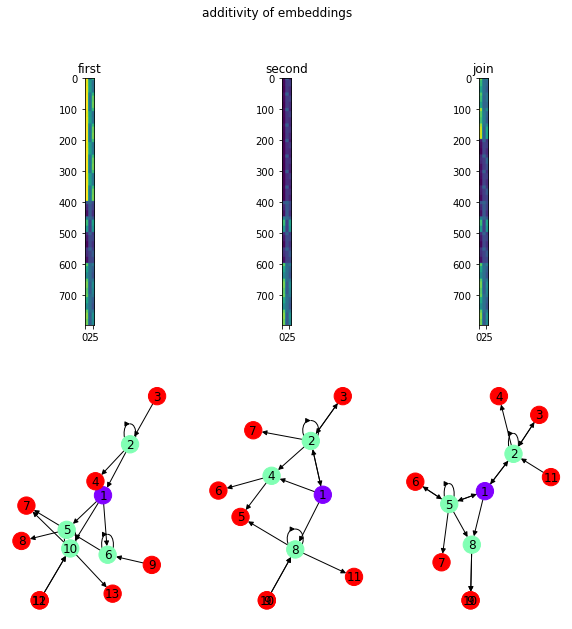

In [111]:
pos1 = 1
pos2 = 0
embed_size = ring_emb.shape[1]-1
list_first = [0]*embed_size
list_first[pos1] = 1
list_second = [0]*embed_size
list_second[pos2] = 1
list_joined = [0]*embed_size
list_joined[pos1] = 1
list_joined[pos2] = 1

embed_first = tf.constant(list_first)
embed_second = tf.constant(list_second)
embed_joined = tf.constant(list_joined)

_, df_out_first, recon_graph_first = mdl.decode(embed_first, incl_graph='graph', delta=0.1)
_, df_out_second, recon_graph_second = mdl.decode(embed_second, incl_graph='graph', delta=0.1)
_, df_out_joined, recon_graph_joined = mdl.decode(embed_joined, incl_graph='graph', delta=0.1)

fig, ax = plt.subplots(2,3, figsize=(10,10))
im_first = Tools.plot_layer(np.squeeze(df_out_first), 10)
im_second = Tools.plot_layer(np.squeeze(df_out_second), 10)
im_joined = Tools.plot_layer(np.squeeze(df_out_joined), 10)

ax[0][0].imshow(im_first, vmin=0, vmax=255)
ax[0][1].imshow(im_second, vmin=0, vmax=255)
ax[0][2].imshow(im_joined, vmin=0, vmax=255)

ax[0][0].set_title("first")
ax[0][1].set_title("second")
ax[0][2].set_title("join")

GraphReconstructor.show_graph(recon_graph_first, ax=ax[1][0])
GraphReconstructor.show_graph(recon_graph_second, ax=ax[1][1])
GraphReconstructor.show_graph(recon_graph_joined, ax=ax[1][2])

fig.suptitle("additivity of embeddings")
plt.show()





## additiviteit van de local neighbourhood
check if local neighbourhood is split in half and converted into an embedding, if the som of the embedding is equal to the original embedding. 

- get the l1_struct of the graph for node 24.
- split the l1_struct to match it with the two different neighbourhoods.
- calculate the embedding of L1 orig, and 2 sub noeighbourhoods.

embedding for node 24 is [0.85493076 0.8177552  0.91937715 0.08963221]
embedding for first incoming neighbourhood is [0.9066521  0.31821328 0.91937715 0.08963221]
embedding for second incoming neighbourhood is [0.87372446 0.48627207 0.91937715 0.08963221]


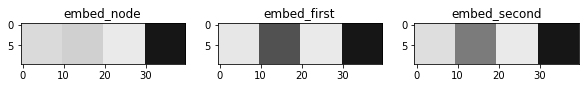

In [133]:
from GAE import graph_reconstructor

NODE_ID = 24
l1_struct, graph_node = mdl.get_l1_structure(NODE_ID, show_graph=False, node_label='node_id', deduplicate=False)

mask = np.zeros(l1_struct.shape)
mask_first = mask.copy()
mask_first[:,:10,:]=1
mask_second = mask.copy()
mask_second[:,10:20,:]=1 
l1_first = tf.math.multiply(l1_struct,mask_first)
l1_second = tf.math.multiply(l1_struct,mask_second)

embed_node = mdl.model.encoder(l1_struct, False)
embed_first = mdl.model.encoder(l1_first, False)
embed_second = mdl.model.encoder(l1_second, False)



print(f"embedding for node {NODE_ID} is {np.squeeze(embed_node)}")
print(f"embedding for first incoming neighbourhood is {np.squeeze(embed_first)}")
print(f"embedding for second incoming neighbourhood is {np.squeeze(embed_second)}")

fig, ax = plt.subplots(2,3, figsize=(10,10))
for i, n in enumerate(['embed_node', 'embed_first', 'embed_second']):
    im = Tools.plot_layer(globals()[n][0], 10)
    ax[1][i].imshow(im, cmap='gray', vmin=0, vmax=255)
    ax[1][i].set_title(n)
plt.show()

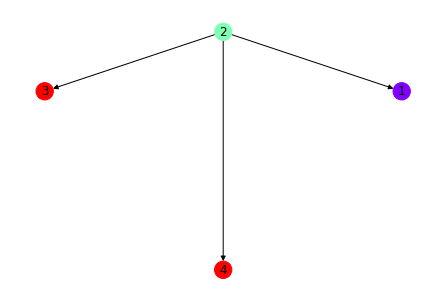

In [135]:
from GAE import graph_reconstructor
target = tf.constant([1,1,len(mdl.encoder_labels)])
graph_rec = GraphReconstructor(deduplicate=False)
recon_graph = graph_rec.reconstruct_graph(target, l1_first, mdl.support_size)
graph_rec.show_graph(recon_graph)


In [126]:
embed[NODE_ID:NODE_ID+1, 1:].shape

(1, 4)

# linearity 2 experiment

In [169]:
import pickle
path = 'graphcase_experiments/graphs/patterns/'

graphs = {}
l1_structs = {}
embeds = {}
for v in ["v0", "v1"]:
    for n in ['G1_with', 'G1_without', 'G2_with', 'G2_without']:
        graphs[n+v] = pickle.load(open(path + n + v + ".pickle", 'rb'))
        l1_struct, _ = mdl.get_l1_structure(0, graph=graphs[n+v], show_graph=False, node_label='node_id', deduplicate=True)
        l1_structs[n+v] = l1_struct
        embeds[n+v] = mdl.model.encoder(l1_struct, False)



In [170]:
delta1 = embeds['G1_with'] - embeds['G1_without']
delta2 = embeds['G2_with'] - embeds['G2_without']
delta_comp = np.vstack((delta1[0], delta2[0]))

group1 =  np.vstack((embeds['G1_with'][0], embeds['G1_without'][0], delta1[0]))
group2 =  np.vstack((embeds['G2_with'][0], embeds['G2_without'][0], delta2[0]))

fig, ax = plt.subplots(1,3, figsize=(3,100), gridspec_kw={'width_ratios': [3, 3, 2]})
for i,n in enumerate([group1, group2, delta_comp]):
    im = Tools.plot_layer(np.transpose(n), 10)
    ax[i].imshow(im, vmin=0, vmax=255)
plt.show()

KeyError: 'G1_with'

In [171]:
# check the euclidian distance between the two
for v in ["v0", "v1"]:
    for gr in ["G1", "G2"]:
        delta = embeds[gr+'_with'+v] - embeds[gr+'_without'+v]
        dist = np.linalg.norm(delta[0][0])
        print(f"delta graph {gr} versie {v} is {dist}")

#expected value is
std = np.std(ring_emb[:,1:])
mean = np.mean(ring_emb[:,1:])
sample = np.random.normal(mean, std, size=(256,2))
sample_delta = sample[:,0] - sample[:,1]
dist = np.linalg.norm(sample_delta)
print(f"Expected value is {dist}")



delta graph G1 versie v0 is 5.216510772705078
delta graph G2 versie v0 is 6.203611850738525
delta graph G1 versie v1 is 5.402382850646973
delta graph G2 versie v1 is 6.3609209060668945
Expected value is 8.034531972175332


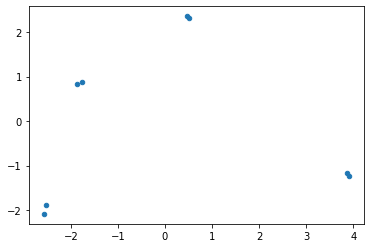

In [172]:
# reduce dimensions of embeding to two
from sklearn.manifold import MDS, Isomap
from sklearn.decomposition import PCA
import pandas as pd

all_embedding = np.vstack([e[0] for e in embeds.values()])
all_embedding.shape

reducer = PCA(n_components=2)

embed_2d = reducer.fit_transform(all_embedding)
embed_df = pd.DataFrame(embed_2d, columns=['embed1', 'embed2'])
embed_df
fig, ax = plt.subplots(1,1)
# plot embeding
ax.scatter(embed_df['embed1'], embed_df['embed2'], s=20)

plt.show()


In [173]:
embed_df

,embed1,embed2
0,-2.530353,-1.877588
1,0.460388,2.353528
2,-1.757555,0.867094
3,3.859108,-1.162911
4,-2.567654,-2.084709
5,0.516152,2.312681
6,-1.877345,0.827552
7,3.897259,-1.235648
